In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [4]:
gold_price_data = pd.read_csv('C:\Py\gold_price_data.csv')

In [5]:
gold_price_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_price_data.shape

(2290, 6)

In [7]:
gold_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_price_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_price_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation  = gold_price_data.corr()

In [17]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<AxesSubplot:>

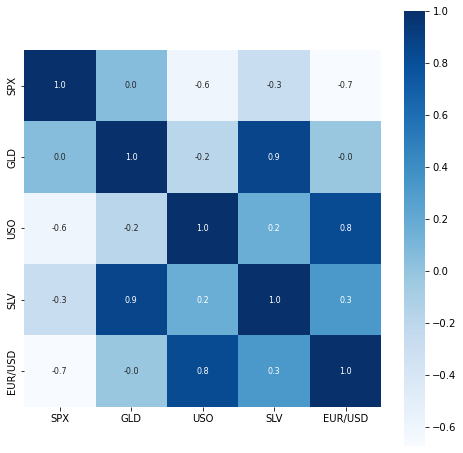

In [18]:
plt.figure(figsize=(8,8))
sb.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

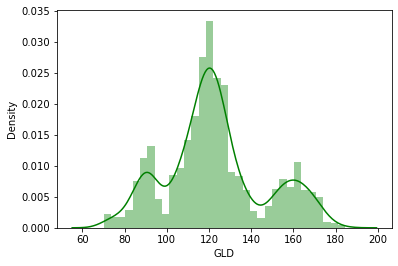

In [20]:
# checking distribution of gold price
sb.distplot(gold_price_data['GLD'], color='green')

In [25]:
# segregate data into dependent & independent variables
x = gold_price_data.drop(['Date', 'GLD'], axis=1)
y = gold_price_data['GLD']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [30]:
random_forest = RandomForestRegressor(n_estimators=100)

In [31]:
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
# prediction on test data
test_data = random_forest.predict(x_test)
r2_error = metrics.r2_score(y_test,test_data )

In [37]:
r2_error

0.9895848987800595

In [38]:
y_test = list(y_test)

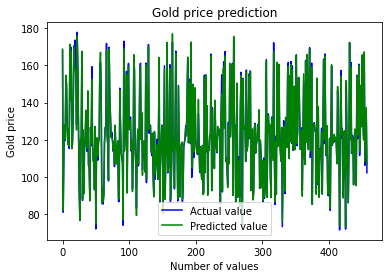

In [39]:
plt.plot(y_test, color='blue', label='Actual value')
plt.plot(test_data, color='green', label='Predicted value')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.title('Gold price prediction')
plt.legend()
plt.show()